In [1]:
%matplotlib inline
import os
from subprocess import call
from io import BytesIO

from nibetaseries.interfaces.nistats import LSABetaSeries, LSSBetaSeries
from nistats.reporting import plot_design_matrix
from nistats import design_matrix as dm
from nistats.hemodynamic_models import glover_hrf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from nilearn.input_data import NiftiLabelsMasker
import nibabel as nib
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import zscore
from nistats.design_matrix import make_first_level_design_matrix
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPS

EXAMPLE_BOLD = '../fmriprep/sub-GE120001/ses-pre/func/sub-GE120001_ses-pre_task-taskswitch_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
EXAMPLE_BOLD_MASK = '../fmriprep/sub-GE120001/ses-pre/func/sub-GE120001_ses-pre_task-taskswitch_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
ACTIVATION_ATLAS = '../data/overall_response_atlas.nii.gz'


200627-21:11:02,755 nipype.utils INFO:
	 Running nipype version 1.4.2 (latest: 1.5.0)


/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/site-packages/nistats/reporting/__init__.py:17: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/jdkent/.conda/env

In [2]:
# convience function to save figures as eps (with transparency)
def save_eps(fig, fname):
    fig.savefig(fname + '.pdf', bbox_inches='tight')
    call(["pdf2ps", fname + '.pdf', fname + '.eps'])
    os.remove(fname + '.pdf')


In [3]:
two_voxel_img = nib.load(os.path.join(os.getcwd(), 'data/bold.nii.gz'))
events_df = pd.read_csv('./data/events19.tsv', sep='\t')

In [4]:
two_voxel_data = two_voxel_img.get_fdata()
two_voxel_mask = nib.Nifti1Image(np.array([[[1, 1]]]), two_voxel_img.affine)
metadata = {"RepetitionTime": 2}

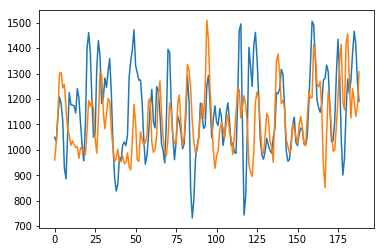

In [5]:
plt.plot(two_voxel_data[0, 0, :, :].T)

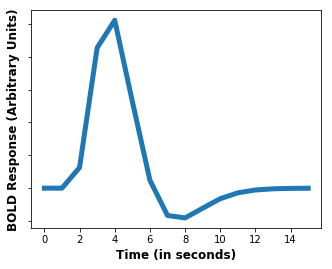

In [6]:
fig, ax = plt.subplots(figsize=(5.2, 4))
model = glover_hrf(tr=2, oversampling=1)
x = np.arange(0, len(model))
ax.plot(x, model, linewidth=5);
ax.set_yticklabels("");
ax.set_ylabel("BOLD Response (Arbitrary Units)", fontdict={"size": "large", "weight": "heavy"});
ax.set_xlabel("Time (in seconds)", fontdict={"size": "large", "weight": "heavy"});
save_eps(fig, "./outputs/introduction-hrf")
save_eps(fig, "./outputs/introduction-hrf_separate")

In [7]:
os.chdir('./outputs/lss')
lss_model = LSSBetaSeries(
    bold_file=two_voxel_img, mask_file=two_voxel_mask,
    bold_metadata=metadata, events_file='../../data/events19.tsv',
    hrf_model='glover',
    smoothing_kernel=None,
    high_pass=0.0078125)
lss_res = lss_model.run()
os.chdir('../..')

/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/site-packages/nibetaseries/interfaces/nistats.py:78: DeprecationWarning: The parameter "mask" will be removed in next release of Nistats. Please use the parameter "mask_img" instead.
  minimize_memory=False,
Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/site-packages/nistats/regression.py:339: FutureWarning: 'resid' from RegressionResults has been deprecated and will be removed. Please use 'residuals' instead.
  FutureWarning,
Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Compu


Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a

In [8]:
# pull out beta series
c0_betas_lss1 = nib.load('./outputs/lss/desc-c0_betaseries.nii.gz').get_fdata()[:,:,0,:].squeeze() / 1000
c1_betas_lss1 = nib.load('./outputs/lss/desc-c1_betaseries.nii.gz').get_fdata()[:,:,0,:].squeeze() / 1000
c0_betas_lss2 = nib.load('./outputs/lss/desc-c0_betaseries.nii.gz').get_fdata()[:,:,1,:].squeeze() / 1000
c1_betas_lss2 = nib.load('./outputs/lss/desc-c1_betaseries.nii.gz').get_fdata()[:,:,1,:].squeeze() / 1000

In [9]:
round(np.corrcoef(c0_betas_lss1, c0_betas_lss2)[0,1], 2)

0.25

In [10]:
lss_c0_1 = lss_res.outputs.design_matrices[0].loc[:,"c0":"other"].rename({"c0": "Target Event", "other": "Condition 1", "c1": "Condition 0"}, axis=1)
lss_c0_2 = lss_res.outputs.design_matrices[7].loc[:,"c0":"other"].rename({"c0": "Target Event", "other": "Condition 1", "c1": "Condition 0"}, axis=1)
lss_c0_3 = lss_res.outputs.design_matrices[42].loc[:,"c0":"other"].rename({"c0": "Target Event", "other": "Condition 1", "c1": "Condition 0"}, axis=1)

In [11]:
lss_res.outputs.design_matrices[6].head()

,c0,c1,other,drift_1,drift_2,drift_3,drift_4,drift_5,constant
0.0,0.000000,0.0,0.000000,0.102865,0.102855,0.102837,0.102812,0.102780,1.0
2.0,0.000000,0.0,0.004989,0.102837,0.102741,0.102581,0.102358,0.102071,1.0
4.0,0.000244,0.0,0.042164,0.102780,0.102514,0.102071,0.101451,0.100656,1.0
6.0,0.019212,0.0,0.059843,0.102695,0.102173,0.101306,0.100096,0.098547,1.0
8.0,0.048225,0.0,0.038539,0.102581,0.101720,0.100290,0.098299,0.095758,1.0


/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


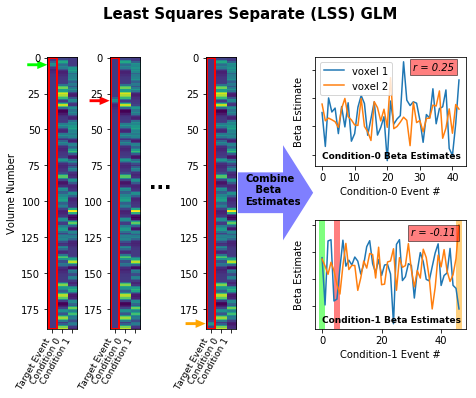

In [12]:
# fig, axes = plt.subplots(ncols=6, figsize=(10, 5),
#                         gridspec_kw={
#                             'width_ratios': [1, 1, 0.5, 1, 1, 10]})
fig = plt.figure(figsize=(7.5, 5))
gs = gridspec.GridSpec(ncols=6, nrows=2, wspace=0.75, hspace=0.5, figure=fig, width_ratios=[2, 2, 0.1, 2, 1, 10])

ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1])
ax3 = fig.add_subplot(gs[:, 2])
ax4 = fig.add_subplot(gs[:, 3])
ax5 = fig.add_subplot(gs[:, 4])
ax6 = fig.add_subplot(gs[0, 5])
ax7 = fig.add_subplot(gs[1, 5])

# create first plot
plot_design_matrix(lss_c0_1, ax=ax1, rescale=False)
# set the parameters for drawing a red box
x = ax1.get_xbound()[0] + 0.15
y = ax1.get_ybound()[1]
width = (ax1.get_xbound()[1] // 2) - 0.2
height = -ax1.get_ybound()[1]
# make the rectangle patch
rect0 = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
ax1.add_patch(rect0)
ax1.set_ylabel("Volume Number")
ax1.set_xticklabels(ax1.get_xticklabels(), fontdict={'size': 9})
ax1.arrow(-2.5, 5, 1, 0,
          clip_on=False,
          width=2.0,
          head_length=1.0,
          edgecolor='none',
          facecolor='lime')

# make the second plot
plot_design_matrix(lss_c0_2, ax=ax2, rescale=False)
rect1 = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
ax2.add_patch(rect1)
ax2.set_ylabel("");
ax2.set_xticklabels(ax2.get_xticklabels(), fontdict={'size': 9})
ax2.arrow(-2.5, 30, 1, 0,
          clip_on=False,
          width=2.0,
          head_length=1.0,
          edgecolor='none',
          facecolor='red')

# make the third plot (...)
ax3.set_axis_off()
ax3.text(-15, 0.5, "...", fontdict={'weight': 'heavy', 'size': 20}, verticalalignment='bottom')

# make the fourth plot
plot_design_matrix(lss_c0_3, ax=ax4, rescale=False)
rect3 = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
ax4.add_patch(rect3)
ax4.set_ylabel("");
ax4.set_xticklabels(ax4.get_xticklabels(), fontdict={'size': 9})
ax4.arrow(-2.5, 185, 1, 0,
          clip_on=False,
          width=2.0,
          head_length=1.0,
          edgecolor='none',
          facecolor='orange')

# make the fifth plot
ax5.set_axis_off()
ax5.text(-1.5, 0.45, "Combine\n   Beta\nEstimates", fontdict={'weight': 'heavy'},verticalalignment='bottom')
ax5.arrow(-2, 0.50, 3, 0,
          clip_on=False,
          width=0.15, 
          head_length=2,
          head_width=0.35,
          edgecolor='none',
          facecolor='blue',
          alpha=0.5)

# graph condition 0 betas
lines = ax6.plot(c0_betas_lss1)
lines.extend(ax6.plot(c0_betas_lss2))
ax6.legend(handles=lines, labels=("voxel 1", "voxel 2"))
ax6.set_xlabel("Condition-0 Event #")
ax6.set_ylabel("Beta Estimate")
ax6.set_yticklabels("")
ax6.text(0, -6, "Condition-0 Beta Estimates", fontdict={'size': 9, 'weight': 'heavy'}, verticalalignment='bottom')
c0_corr = round(np.corrcoef(c0_betas_lss1, c0_betas_lss2)[0,1], 2)
ax6.text(28, 10, 'r = {}'.format(c0_corr), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3})

# graph condition 1 betas
ax7.plot(c1_betas_lss1)
ax7.plot(c1_betas_lss2)
ax7.set_xlabel("Condition-1 Event #")
ax7.set_ylabel("Beta Estimate")
ax7.set_yticklabels("")
ax7.text(0, -8.5, "Condition-1 Beta Estimates", fontdict={'size': 9, 'weight': 'heavy'}, verticalalignment='bottom')
# ax7.arrow(0, c1_betas_lss[0]+3, 0, -2,
#          clip_on=False,
#          width=0.75,
#          head_length=1.25,
#          edgecolor='none',
#          facecolor='green')

#ax7.arrow(5, c1_betas_lss[5]-3, 0, 2,
#          clip_on=False,
#          width=0.75,
#          head_length=1.25,
#          edgecolor='none',
#          facecolor='red', zorder=100)


#ax7.arrow(46, c1_betas_lss[46]-3, 0, 2,
#          clip_on=False,
#          width=0.75,
#          head_length=1.25,
#          edgecolor='none',
#          facecolor='orange')

y_pos = ax7.get_ybound()[0]
y_height = ax7.get_ybound()[1] * 2
ax7.add_patch(patches.Rectangle((-1, y_pos), 2, y_height, facecolor='lime', alpha=0.5))
ax7.add_patch(patches.Rectangle((4, y_pos), 2, y_height, facecolor='red', alpha=0.5))
ax7.add_patch(patches.Rectangle((45, y_pos), 2, y_height, facecolor='orange', alpha=0.5))

c1_corr = round(np.corrcoef(c1_betas_lss1, c1_betas_lss2)[0,1], 2)
ax7.text(30, 8, 'r = {}'.format(c1_corr), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3})

fig.suptitle("Least Squares Separate (LSS) GLM", fontsize=15, fontweight='heavy', x=0.50, y=1.02);
save_eps(fig, "./outputs/introduction-lss")

In [13]:
fig.suptitle("")
save_eps(fig, "./outputs/introduction-lss_separate")

In [14]:
os.chdir('./outputs/lsa')
lsa_model = LSABetaSeries(
    bold_file=two_voxel_img, mask_file=two_voxel_mask,
    bold_metadata=metadata, events_file='../../data/events19.tsv',
    hrf_model='glover',
    smoothing_kernel=None,
    high_pass=0.0078125)
lsa_res = lsa_model.run()
os.chdir('../..')

/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/site-packages/nibetaseries/interfaces/nistats.py:203: DeprecationWarning: The parameter "mask" will be removed in next release of Nistats. Please use the parameter "mask_img" instead.
  minimize_memory=False,
Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/site-packages/nistats/regression.py:339: FutureWarning: 'resid' from RegressionResults has been deprecated and will be removed. Please use 'residuals' instead.
  FutureWarning,


In [15]:
c0_betas_lsa1 = nib.load('./outputs/lsa/desc-c0_betaseries.nii.gz').get_fdata()[:,:,0,:].squeeze() / 1000
c1_betas_lsa1 = nib.load('./outputs/lsa/desc-c1_betaseries.nii.gz').get_fdata()[:,:,0,:].squeeze() / 1000
c0_betas_lsa2 = nib.load('./outputs/lsa/desc-c0_betaseries.nii.gz').get_fdata()[:,:,1,:].squeeze() / 1000
c1_betas_lsa2 = nib.load('./outputs/lsa/desc-c1_betaseries.nii.gz').get_fdata()[:,:,1,:].squeeze() / 1000

In [16]:
lsa_des = lsa_res.outputs.design_matrices[0].loc[:,"c0_0001":"c1_0047"]

In [17]:
np.corrcoef(c1_betas_lsa1, c1_betas_lsa2)

array([[1.        , 0.37172188],
       [0.37172188, 1.        ]])

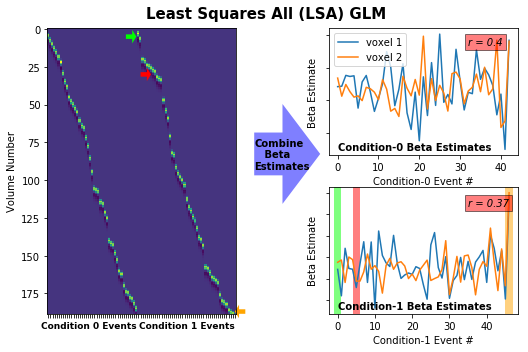

In [18]:
fig = plt.figure(figsize=(7.5, 5))
gs = gridspec.GridSpec(ncols=3, nrows=2, figure=fig, width_ratios=[10, 1, 10])

ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 2])

plot_design_matrix(lsa_des, ax=ax1, rescale=False)
n_labels = len(ax1.get_xticklabels())
new_labels = ['Condition 0 Events' if v == 42 else 'Condition 1 Events' if v == 89 else '' for v in range(n_labels)]
ax1.set_xticklabels(new_labels, fontdict={'fontsize': 9, 'fontweight': 'heavy'}, rotation=0);
ax1.set_ylabel("Volume Number")

ax1.arrow(37, 5, 3, 0,
          clip_on=False,
          width=3.0,
          head_length=2.0,
          edgecolor='none',
          facecolor='lime')

ax1.arrow(44, 30, 3, 0,
          clip_on=False,
          width=3.0,
          head_length=2.0,
          edgecolor='none',
          facecolor='red')

ax1.arrow(94, 187, -3, 0,
          clip_on=False,
          width=3.0,
          head_length=2.0,
          edgecolor='none',
          facecolor='orange')

ax2.set_axis_off()
ax2.text(-1, 0.5, "Combine\n   Beta\nEstimates", fontdict={'weight': 'heavy'},verticalalignment='bottom')
ax2.arrow(-1, 0.56, 1.5, 0,
          clip_on=False,
          width=0.15, 
          head_length=2,
          head_width=0.35,
          edgecolor='none',
          facecolor='blue',
          alpha=0.5)

# graph condition 0 betas
lines = ax3.plot(c0_betas_lsa1)
lines.extend(ax3.plot(c0_betas_lsa2))
ax3.legend(handles=lines, labels=("voxel 1", "voxel 2"), loc='upper left')

c0_corr = round(np.corrcoef(c0_betas_lsa1, c0_betas_lsa2)[0,1], 2)
ax3.text(32, 8.5, 'r = {}'.format(c0_corr), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3})

ax3.set_xlabel("Condition-0 Event #")
ax3.set_ylabel("Beta Estimate")
ax3.set_yticklabels("")
ax3.text(0, -8, "Condition-0 Beta Estimates", fontdict={'weight': 'heavy'}, verticalalignment='bottom')
# graph condition 1 betas
ax4.plot(c1_betas_lsa1)
ax4.plot(c1_betas_lsa2)
ax4.set_xlabel("Condition-1 Event #")
ax4.set_ylabel("Beta Estimate")
ax4.set_yticklabels("")
ax4.text(0, -7.5, "Condition-1 Beta Estimates", fontdict={'weight': 'heavy'}, verticalalignment='bottom')

#ax4.arrow(0, c1_betas_lsa[0]+3, 0, -2,
#          clip_on=False,
#          width=0.75,
#          head_length=1.25,
#          edgecolor='none',
#          facecolor='green')

#ax4.arrow(5, c1_betas_lsa[5]-3, 0, 2,
#          clip_on=False,
#          width=0.75,
#          head_length=1.25,
#          edgecolor='none',
#          facecolor='red', zorder=100)


#ax4.arrow(46, c1_betas_lsa[46]+3, 0, -2,
#          clip_on=False,
#          width=0.75,
#          head_length=1.25,
#          edgecolor='none',
#          facecolor='orange')

c1_corr = round(np.corrcoef(c1_betas_lsa1, c1_betas_lsa2)[0,1], 2)
ax4.text(35, 17, 'r = {}'.format(c1_corr), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3})

y_pos = ax7.get_ybound()[0]
y_height = ax7.get_ybound()[1] * 3
ax4.add_patch(patches.Rectangle((-1, y_pos), 2, y_height, facecolor='lime', alpha=0.5))
ax4.add_patch(patches.Rectangle((4, y_pos), 2, y_height, facecolor='red', alpha=0.5))
ax4.add_patch(patches.Rectangle((45, y_pos), 2, y_height, facecolor='orange', alpha=0.5))

fig.suptitle("Least Squares All (LSA) GLM", fontsize=15, fontweight='heavy', x=0.50, y=1.02);
save_eps(fig, "./outputs/introduction-lsa")

In [19]:
fig.suptitle("");
save_eps(fig, "./outputs/introduction-lsa_separate")

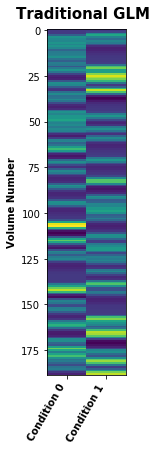

In [20]:
# LSU model (traditional model)
tr = 2
frame_times = np.arange(two_voxel_img.shape[-1]) * tr
lsu_design_matrix = dm.make_first_level_design_matrix(frame_times, events=events_df, high_pass=0.0).loc[:,'c0':'c1']

lsu_design_matrix.rename({"c0": "Condition 0", "c1": "Condition 1"}, axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(2, 6))

plot_design_matrix(lsu_design_matrix, rescale=False, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), weight="heavy")
ax.set_ylabel("Volume Number", fontdict={"weight": "heavy"});
fig.suptitle("Traditional GLM", fontsize=15, fontweight='heavy', x=0.60, y=1.02);
save_eps(fig, "./outputs/introduction-normalGLM")

In [21]:
fig.suptitle("");
save_eps(fig, "./outputs/introduction-normalGLM_separate")

## Show example Simulation/Real Data

In [22]:
masker = NiftiLabelsMasker(ACTIVATION_ATLAS)
real_bold_data = masker.fit_transform(EXAMPLE_BOLD).T

In [23]:
real_bold_data.shape

(21, 471)

In [24]:
fake_bold = nib.load('./data/bold_sim_taskswitch.nii.gz')
fake_bold_data = fake_bold.get_fdata().squeeze()

In [25]:
fake_bold_data.shape

(2, 471)

In [26]:
tr = 2
nvol = 471
frame_times = np.arange(0, nvol * tr, 2)
events_df = pd.read_csv('./data/sub-GE120012_ses-pre_task-taskswitch_events.tsv', sep='\t')
design = make_first_level_design_matrix(frame_times=frame_times, events=events_df, oversampling=1)

In [27]:
predicted_bold = design[['repeat', 'single', 'switch']].sum(axis=1).values

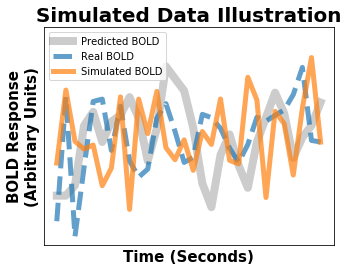

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(5.2, 4))

# set the plots and legend
lines = ax.plot(zscore(predicted_bold[20:50]), color='black', linewidth=8, alpha=0.2)
lines.extend(ax.plot(zscore(real_bold_data[2,20:50]), linewidth=5, linestyle='--', alpha=0.7))
lines.extend(ax.plot(zscore(fake_bold_data[0,20:50]), linewidth=5, alpha=0.7))
ax.legend(handles=lines, labels=("Predicted BOLD", "Real BOLD", "Simulated BOLD"))

# remove the ticks
ax.set_yticks([])
ax.set_xticks([]);

# extend ylim
ax.set_ylim(-3, 3)

# label axes
ax.set_ylabel("BOLD Response\n(Arbitrary Units)", fontdict={'size': 15, 'weight': 'heavy'});
ax.set_xlabel("Time (Seconds)", fontdict={'size': 15, 'weight': 'heavy'});
ax.set_title('Simulated Data Illustration', fontdict={'size': 20, 'weight': 'heavy'})
save_eps(fig, "./outputs/methods-simulation_example")

In [29]:
ax.set_title("")
save_eps(fig, "./outputs/methods-simulation_example_separate")

## Show Event/Block/Mixed designs

### event related design

In [198]:
rand = np.random.RandomState(123)
event_size = 60

In [199]:
event_related_ieis = rand.exponential(scale=8, size=event_size)
display(event_related_ieis)
onsets = np.cumsum(event_related_ieis)
onsets

array([ 9.53817715,  2.69653986,  2.05827264,  6.41146945, 10.16856748,
        4.40078029, 31.60785655,  9.23713819,  5.24576155,  3.98218962,
        3.362738  , 10.44655918,  4.61817741,  0.49226239,  4.0605708 ,
       10.71514592,  1.61195408,  1.54335701,  6.06663071,  6.07134918,
        8.04974449, 15.14671282, 10.31204403,  7.55389101, 10.25384272,
        3.12018655,  3.59268632,  2.07289408,  2.78188072,  7.97515146,
        0.77301184,  4.54906701,  4.50906948,  5.44477173,  4.43864212,
        2.99476958,  4.44590482, 17.9085609 , 23.08212117,  5.57461837,
        7.82432812,  0.98293304,  3.05342791,  4.28677122, 16.09780234,
        2.30631529,  5.27822945, 33.90190639,  5.86317665,  7.59246464,
        1.02838416, 14.00528419,  7.39176373,  6.30085869,  3.35769491,
        2.90063345,  4.31684953,  9.14805968, 16.66482377,  5.71369738])

array([  9.53817715,  12.23471701,  14.29298965,  20.7044591 ,
        30.87302659,  35.27380687,  66.88166343,  76.11880162,
        81.36456316,  85.34675278,  88.70949078,  99.15604996,
       103.77422737, 104.26648977, 108.32706057, 119.04220649,
       120.65416057, 122.19751758, 128.26414829, 134.33549747,
       142.38524196, 157.53195478, 167.84399881, 175.39788981,
       185.65173253, 188.77191909, 192.3646054 , 194.43749948,
       197.2193802 , 205.19453166, 205.9675435 , 210.51661051,
       215.02567999, 220.47045172, 224.90909384, 227.90386342,
       232.34976824, 250.25832915, 273.34045032, 278.91506869,
       286.73939681, 287.72232985, 290.77575776, 295.06252898,
       311.16033132, 313.46664661, 318.74487606, 352.64678245,
       358.5099591 , 366.10242374, 367.1308079 , 381.13609209,
       388.52785583, 394.82871452, 398.18640942, 401.08704287,
       405.4038924 , 414.55195209, 431.21677585, 436.93047324])

In [200]:
trial_type = rand.choice(["word", "nonword"], size=event_size)
trial_type

array(['nonword', 'word', 'nonword', 'nonword', 'nonword', 'nonword',
       'word', 'word', 'word', 'nonword', 'nonword', 'word', 'word',
       'nonword', 'nonword', 'word', 'word', 'word', 'nonword', 'word',
       'nonword', 'nonword', 'word', 'word', 'nonword', 'word', 'nonword',
       'nonword', 'nonword', 'nonword', 'word', 'nonword', 'word',
       'nonword', 'word', 'word', 'nonword', 'nonword', 'word', 'nonword',
       'nonword', 'nonword', 'word', 'nonword', 'nonword', 'nonword',
       'nonword', 'word', 'word', 'nonword', 'nonword', 'word', 'word',
       'nonword', 'word', 'word', 'word', 'nonword', 'word', 'nonword'],
      dtype='<U7')

In [201]:
event_related_df = pd.DataFrame({"trial_type": trial_type, "onset": onsets, "duration": [1] * len(onsets)})
event_related_df.head()

,trial_type,onset,duration
0,nonword,9.538177,1
1,word,12.234717,1
2,nonword,14.292990,1
3,nonword,20.704459,1
4,nonword,30.873027,1


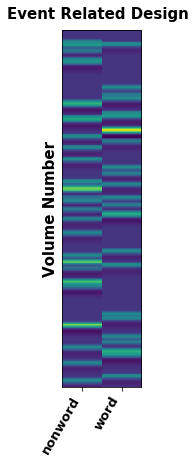

In [202]:
frame_times = np.arange(int(onsets.max()) + 16)
event_design_matrix = dm.make_first_level_design_matrix(frame_times, events=event_related_df, high_pass=0.0).loc[:,'nonword':'word']
fig, ax = plt.subplots(figsize=(2, 6))

plot_design_matrix(event_design_matrix, rescale=False, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), weight="heavy", size=13)
ax.set_yticks([])
ax.set_ylabel("Volume Number", fontdict={"weight": "heavy"}, size=15);
fig.suptitle("Event Related Design", fontsize=15, fontweight='heavy', x=0.60, y=1.02);
save_eps(fig, "./outputs/event_design")

### Block Designs

In [203]:
rest_time = 30
num_blocks = 4
block_size = event_size // 2
block_iei = 2

block_onsets = np.array([])

for block_idx in range(num_blocks):
    block_onsets = np.append(block_onsets, np.arange(0, block_size*block_iei, block_iei) + block_idx*(rest_time*3))
block_onsets

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  90.,  92.,  94.,
        96.,  98., 100., 102., 104., 106., 108., 110., 112., 114., 116.,
       118., 120., 122., 124., 126., 128., 130., 132., 134., 136., 138.,
       140., 142., 144., 146., 148., 180., 182., 184., 186., 188., 190.,
       192., 194., 196., 198., 200., 202., 204., 206., 208., 210., 212.,
       214., 216., 218., 220., 222., 224., 226., 228., 230., 232., 234.,
       236., 238., 270., 272., 274., 276., 278., 280., 282., 284., 286.,
       288., 290., 292., 294., 296., 298., 300., 302., 304., 306., 308.,
       310., 312., 314., 316., 318., 320., 322., 324., 326., 328.])

In [204]:
word_trial_type = np.repeat(["word"], block_size)
word_trial_type
nonword_trial_type = np.repeat(["nonword"], block_size)

block_trial_type = np.hstack((word_trial_type, nonword_trial_type, word_trial_type, nonword_trial_type))
block_event_df = pd.DataFrame({"trial_type": block_trial_type, "onset": block_onsets, "duration": [1] * len(block_onsets)})
block_event_df.head()

,trial_type,onset,duration
0,word,0.0,1
1,word,2.0,1
2,word,4.0,1
3,word,6.0,1
4,word,8.0,1


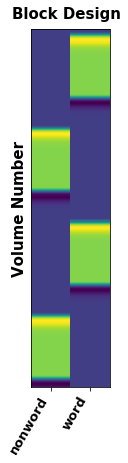

In [205]:
block_frame_times = np.arange(int(block_onsets.max()) + 16)
block_design_matrix = dm.make_first_level_design_matrix(block_frame_times, events=block_event_df, high_pass=0.0).loc[:,'nonword':'word']
fig, ax = plt.subplots(figsize=(2, 6))

plot_design_matrix(block_design_matrix, rescale=False, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), weight="heavy", size=13)
ax.set_yticks([])
ax.set_ylabel("Volume Number", fontdict={"weight": "heavy"}, size=15);
fig.suptitle("Block Design", fontsize=15, fontweight='heavy', x=0.60, y=1.02);
save_eps(fig, "./outputs/block_design")

### Mixed design

In [206]:
num_mixed_blocks = 4
mixed_block_size = event_size // 2

mixed_block_onsets = np.array([])

for block_idx in range(num_mixed_blocks):
    mixed_ieis = rand.exponential(scale=2, size=mixed_block_size)
    mixed_onsets = np.cumsum(mixed_ieis) + block_idx*(rest_time*3)
    
    mixed_block_onsets = np.append(mixed_block_onsets, mixed_onsets)
mixed_block_onsets.shape

(120,)

In [207]:
word_mixed_trial_type = np.repeat(["word"], mixed_block_size)
nonword_mixed_trial_type = np.repeat(["nonword"], mixed_block_size)
mixed_block_trial_type1 = rand.choice(["word", "nonword"], size=mixed_block_size)
mixed_block_trial_type2 = rand.choice(["word", "nonword"], size=mixed_block_size)
mixed_trial_type = np.hstack((word_mixed_trial_type, nonword_mixed_trial_type, mixed_block_trial_type1, mixed_block_trial_type2))
mixed_trial_type.shape

(120,)

In [208]:
mixed_event_df = pd.DataFrame({"trial_type": mixed_trial_type, "onset": mixed_block_onsets, "duration": [1] * len(mixed_block_onsets)})
mixed_event_df.head()

,trial_type,onset,duration
0,word,2.441281,1
1,word,13.186708,1
2,word,14.066557,1
3,word,16.942135,1
4,word,18.740889,1


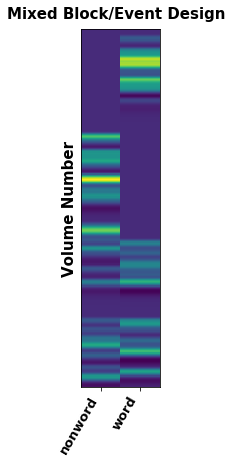

In [209]:
mixed_frame_times = np.arange(int(mixed_block_onsets.max()) + 16)
mixed_design_matrix = dm.make_first_level_design_matrix(mixed_frame_times, events=mixed_event_df, high_pass=0.0).loc[:,'nonword':'word']
fig, ax = plt.subplots(figsize=(2, 6))

plot_design_matrix(mixed_design_matrix, rescale=False, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), weight="heavy", size=13)
ax.set_yticks([])
ax.set_ylabel("Volume Number", fontdict={"weight": "heavy"}, size=15);
fig.suptitle("Mixed Block/Event Design", fontsize=15, fontweight='heavy', x=0.60, y=1.02);
save_eps(fig, "./outputs/mixed_design")